In [10]:
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [11]:
import numpy as np
import keras
from keras import models, layers

def vectorize_sequences(sequences, dimension=10000):
    #create all-zero matrix
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            # Only set to 1 if the index is within bounds
            if j < dimension:
                results[i, j] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

#sparse_categorical_crossentropy
y_train = np.array(train_labels)
y_test = np.array(test_labels)


### try using larger or smaller layers: 32 units, 128 units, and so on.

In [15]:
model = keras.Sequential([
	layers.Dense(32, activation="relu"),
	layers.Dense(64, activation="relu"),
	layers.Dense(46, activation="softmax"),
])

model.compile(optimizer="rmsprop",
			loss="sparse_categorical_crossentropy",
			metrics=["accuracy"])

x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = y_train[:1000]
partial_y_train = y_train[1000:]

history =model.fit(partial_x_train,
					partial_y_train,
					epochs=9,
					batch_size=512,
					validation_data=(x_val, y_val))



Epoch 1/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.4521 - loss: 3.1312 - val_accuracy: 0.5800 - val_loss: 2.2834
Epoch 2/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6303 - loss: 1.8898 - val_accuracy: 0.6490 - val_loss: 1.6203
Epoch 3/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6976 - loss: 1.4185 - val_accuracy: 0.6990 - val_loss: 1.3741
Epoch 4/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7471 - loss: 1.1859 - val_accuracy: 0.7270 - val_loss: 1.2329
Epoch 5/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7838 - loss: 1.0210 - val_accuracy: 0.7460 - val_loss: 1.1493
Epoch 6/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8125 - loss: 0.8861 - val_accuracy: 0.7700 - val_loss: 1.0788
Epoch 7/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8379 - loss: 0.7713 - val_accuracy: 0.7690 - val_loss: 1.0370
Epoch 8/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8578 - loss: 0.6733 - val_accuracy: 0.7930 - val_loss:

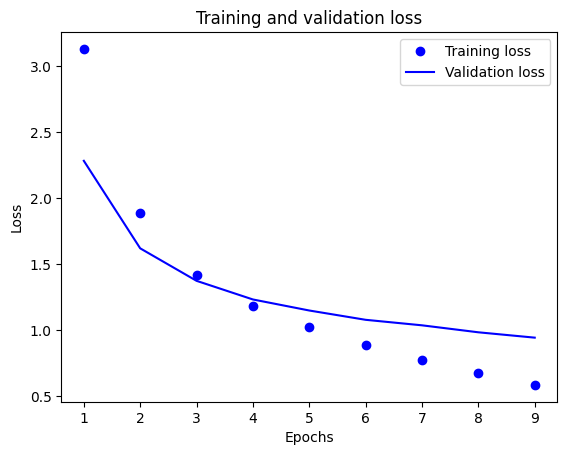

In [17]:
import matplotlib.pyplot as plt

loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()

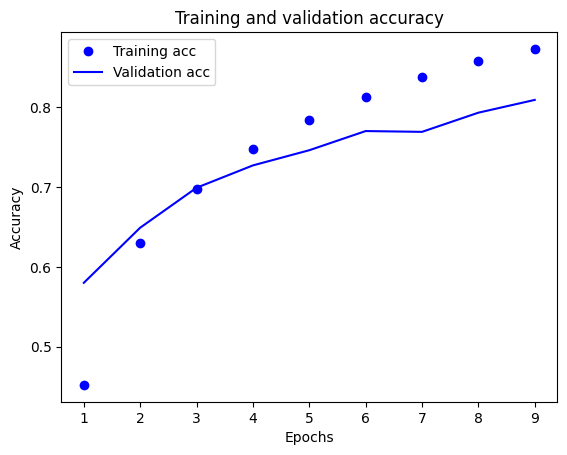

In [18]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.show()

2 layers de 32 -> 64 units conseguiram melhor resultado do que 2 layers de 64

testando com 64 -> 128 units:

Epoch 1/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.4753 - loss: 2.7960 - val_accuracy: 0.6140 - val_loss: 1.8253
Epoch 2/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6736 - loss: 1.5312 - val_accuracy: 0.6970 - val_loss: 1.3588
Epoch 3/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7377 - loss: 1.1769 - val_accuracy: 0.7370 - val_loss: 1.1823
Epoch 4/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7930 - loss: 0.9549 - val_accuracy: 0.7620 - val_loss: 1.0733
Epoch 5/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8321 - loss: 0.7812 - val_accuracy: 0.7920 - val_loss: 0.9894
Epoch 6/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8606 - loss: 0.6379 - val_accuracy: 0.7910 - val_loss: 0.9507
Epoch 7/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8849 - loss: 0.5250 - val_accuracy: 0.8090 - val_loss: 0.8946
Epoch 8/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9060 - loss: 0.4340 - val_accuracy: 0.8190 - val_loss:

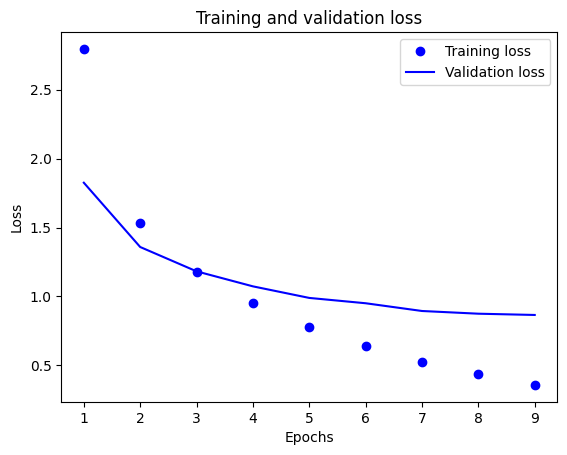

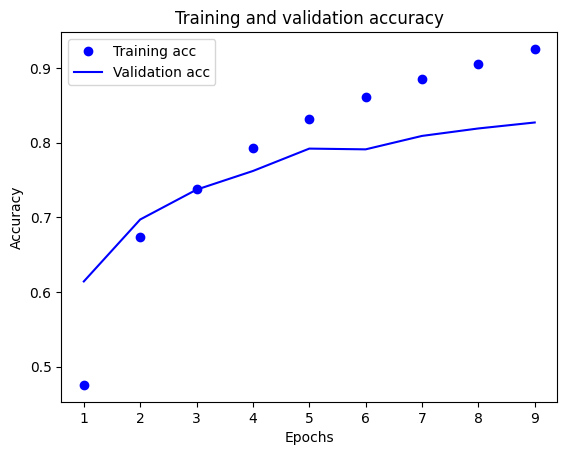

In [19]:
model = keras.Sequential([
	layers.Dense(64, activation="relu"),
	layers.Dense(128, activation="relu"),
	layers.Dense(46, activation="softmax"),
])

model.compile(optimizer="rmsprop",
			loss="sparse_categorical_crossentropy",
			metrics=["accuracy"])

x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = y_train[:1000]
partial_y_train = y_train[1000:]

history =model.fit(partial_x_train,
					partial_y_train,
					epochs=9,
					batch_size=512,
					validation_data=(x_val, y_val))

loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()

acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.show()

In [21]:
results = model.evaluate(x_test, y_test)
results


71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7876 - loss: 0.9391


[0.9391347169876099, 0.7876224517822266]

overfitting!!

### - You used two intermediate layers before the final softmax classification layer. Now try using a single intermediate layer, or three intermediate layers.

Epoch 1/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.4681 - loss: 2.8909 - val_accuracy: 0.5910 - val_loss: 1.9332
Epoch 2/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6520 - loss: 1.6648 - val_accuracy: 0.6700 - val_loss: 1.4830
Epoch 3/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7052 - loss: 1.3227 - val_accuracy: 0.7010 - val_loss: 1.3134
Epoch 4/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7364 - loss: 1.1176 - val_accuracy: 0.7140 - val_loss: 1.2026
Epoch 5/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7685 - loss: 0.9734 - val_accuracy: 0.7400 - val_loss: 1.1400
Epoch 6/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8069 - loss: 0.8372 - val_accuracy: 0.7570 - val_loss: 1.0857
Epoch 7/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8320 - loss: 0.7285 - val_accuracy: 0.7700 - val_loss: 1.0460
Epoch 8/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8553 - loss: 0.6292 - val_accuracy: 0.7720 - val_loss:

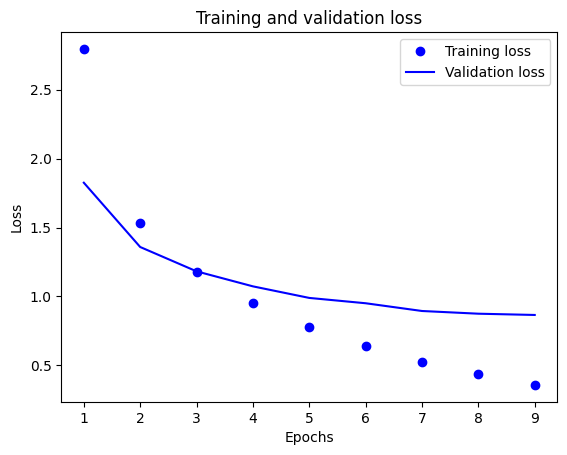

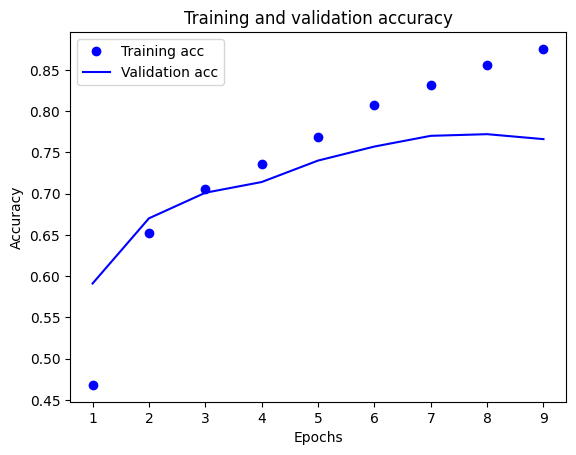

In [22]:
model = keras.Sequential([
	layers.Dense(32, activation="relu"),
	layers.Dense(64, activation="relu"),
	layers.Dense(64, activation="relu"),
	layers.Dense(46, activation="softmax"),
])

model.compile(optimizer="rmsprop",
			loss="sparse_categorical_crossentropy",
			metrics=["accuracy"])

x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = y_train[:1000]
partial_y_train = y_train[1000:]

history =model.fit(partial_x_train,
					partial_y_train,
					epochs=9,
					batch_size=512,
					validation_data=(x_val, y_val))

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()

acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.show()

pior do que o de 32 -> 64

### single layer

Epoch 1/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.5366 - loss: 2.6542 - val_accuracy: 0.6470 - val_loss: 1.9176
Epoch 2/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6924 - loss: 1.5802 - val_accuracy: 0.7120 - val_loss: 1.4144
Epoch 3/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7596 - loss: 1.1796 - val_accuracy: 0.7460 - val_loss: 1.1865
Epoch 4/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8069 - loss: 0.9505 - val_accuracy: 0.7800 - val_loss: 1.0611
Epoch 5/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8368 - loss: 0.7917 - val_accuracy: 0.8030 - val_loss: 0.9813
Epoch 6/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8683 - loss: 0.6706 - val_accuracy: 0.8030 - val_loss: 0.9306
Epoch 7/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8867 - loss: 0.5721 - val_accuracy: 0.8090 - val_loss: 0.8884
Epoch 8/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9012 - loss: 0.4931 - val_accuracy: 0.8070 - val_loss:

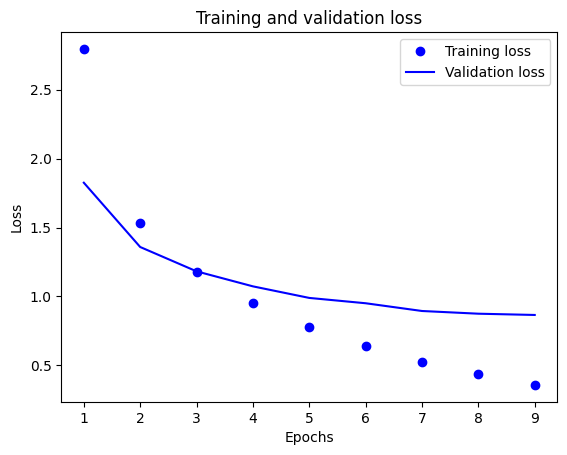

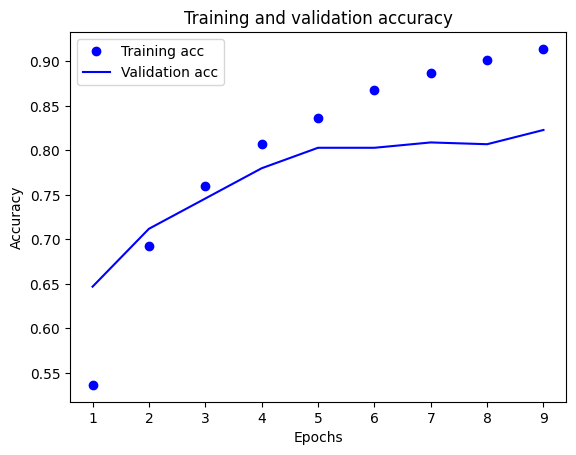

In [24]:
model = keras.Sequential([
	layers.Dense(64, activation="relu"),
	layers.Dense(46, activation="softmax"),
])

model.compile(optimizer="rmsprop",
			loss="sparse_categorical_crossentropy",
			metrics=["accuracy"])

x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = y_train[:1000]
partial_y_train = y_train[1000:]

history =model.fit(partial_x_train,
					partial_y_train,
					epochs=9,
					batch_size=512,
					validation_data=(x_val, y_val))

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()

acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.show()

conclusion: 32 -> 64 ainda é superior